In [60]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import anndata as ad
import scipy
import seaborn as sns
import scanpy as sc
import muon as mu
import math
from matplotlib.pyplot import rc_context
import os
from pathlib import Path
from scipy.stats import spearmanr
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import seaborn as sns

In [54]:
AML_all = mu.read("pAML_main.h5mu")
AML_all

/home/sina.kanannejad/miniconda3/envs/pertpy-env/lib/python3.11/site-packages/mudata/_core/mudata.py:1454: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behaviour, which will become the default. Use new pull_obs/pull_var and push_obs/push_var methods for more flexibility.
  self._update_attr("var", axis=0, join_common=join_common)
/home/sina.kanannejad/miniconda3/envs/pertpy-env/lib/python3.11/site-packages/mudata/_core/mudata.py:1352: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behaviour, which will become the default. Use new pull_obs/pull_var and push_obs/push_var methods for more flexibility.
  self._update_attr("obs", axis=1, join_common=join_common)


MuData object with n_obs × n_vars = 259817 × 36682
  2 modalities
    rna:	259817 x 36601
      obs:	'n_genes', 'n_counts', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'sample', 'type', 'outlier', 'annotation', 'Cytogenetics', 'state', 'state_major', 'sample_major', 'immu_phe', 'EPPERT_CE_HSC_LSC', 'EPPERT_LSC_R', 'EPPERT_HSC_R', 'GAL_LEUKEMIC_STEM_CELL_UP', 'GENTLES_LEUKEMIC_STEM_CELL_UP', 'LSC104_Ng2016_UP', 'LSPC_Quiescent', 'LSPC_Primed_Top100', 'Bulk_LSC_score', 'LSC104_Ng2016_DOWN', 'MLL_LSC_Somervaille2009_UP', 'MLL_LSC_Somervaille2009_DOWN', 'LSPC_Cycle_Top100', 'GMP_like_Top100', 'ProMono_like_Top100', 'Mono_like_Top100', 'cDC_like_Top100', 'GENTLES_LEUKEMIC_STEM_CELL_DN', 'GAL_LEUKEMIC_STEM_CELL_DN', 'S_score', 'G2M_score', 'Blast_score', 'Blast_extended'
      var:	'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
      uns:	'Cytogenetics_colors', 'annotation_colors', 'hvg', 'log1p', 'neighbors', 'pca', 'sample_colors', 'sample_major_colors', 'state_colors', 'umap'
      obsm:	'X_pca', 'X_umap', 'aucell_estimate', 'uninteg_UMAP'
      varm:	'PCs'
      layers:	'lognorm_counts', 'raw_counts'
      obsp:	'connectivities', 'distances'
    adt:	259817 x 81
      obs:	'sample', 'type', 'annotation'
      layers:	'raw_counts'

In [85]:
sc.settings.verbosity = 0
sc.settings.set_figure_params(
    dpi=300,
    facecolor="white",
    frameon=False, fontsize = 7
)
sns.set_style("white")

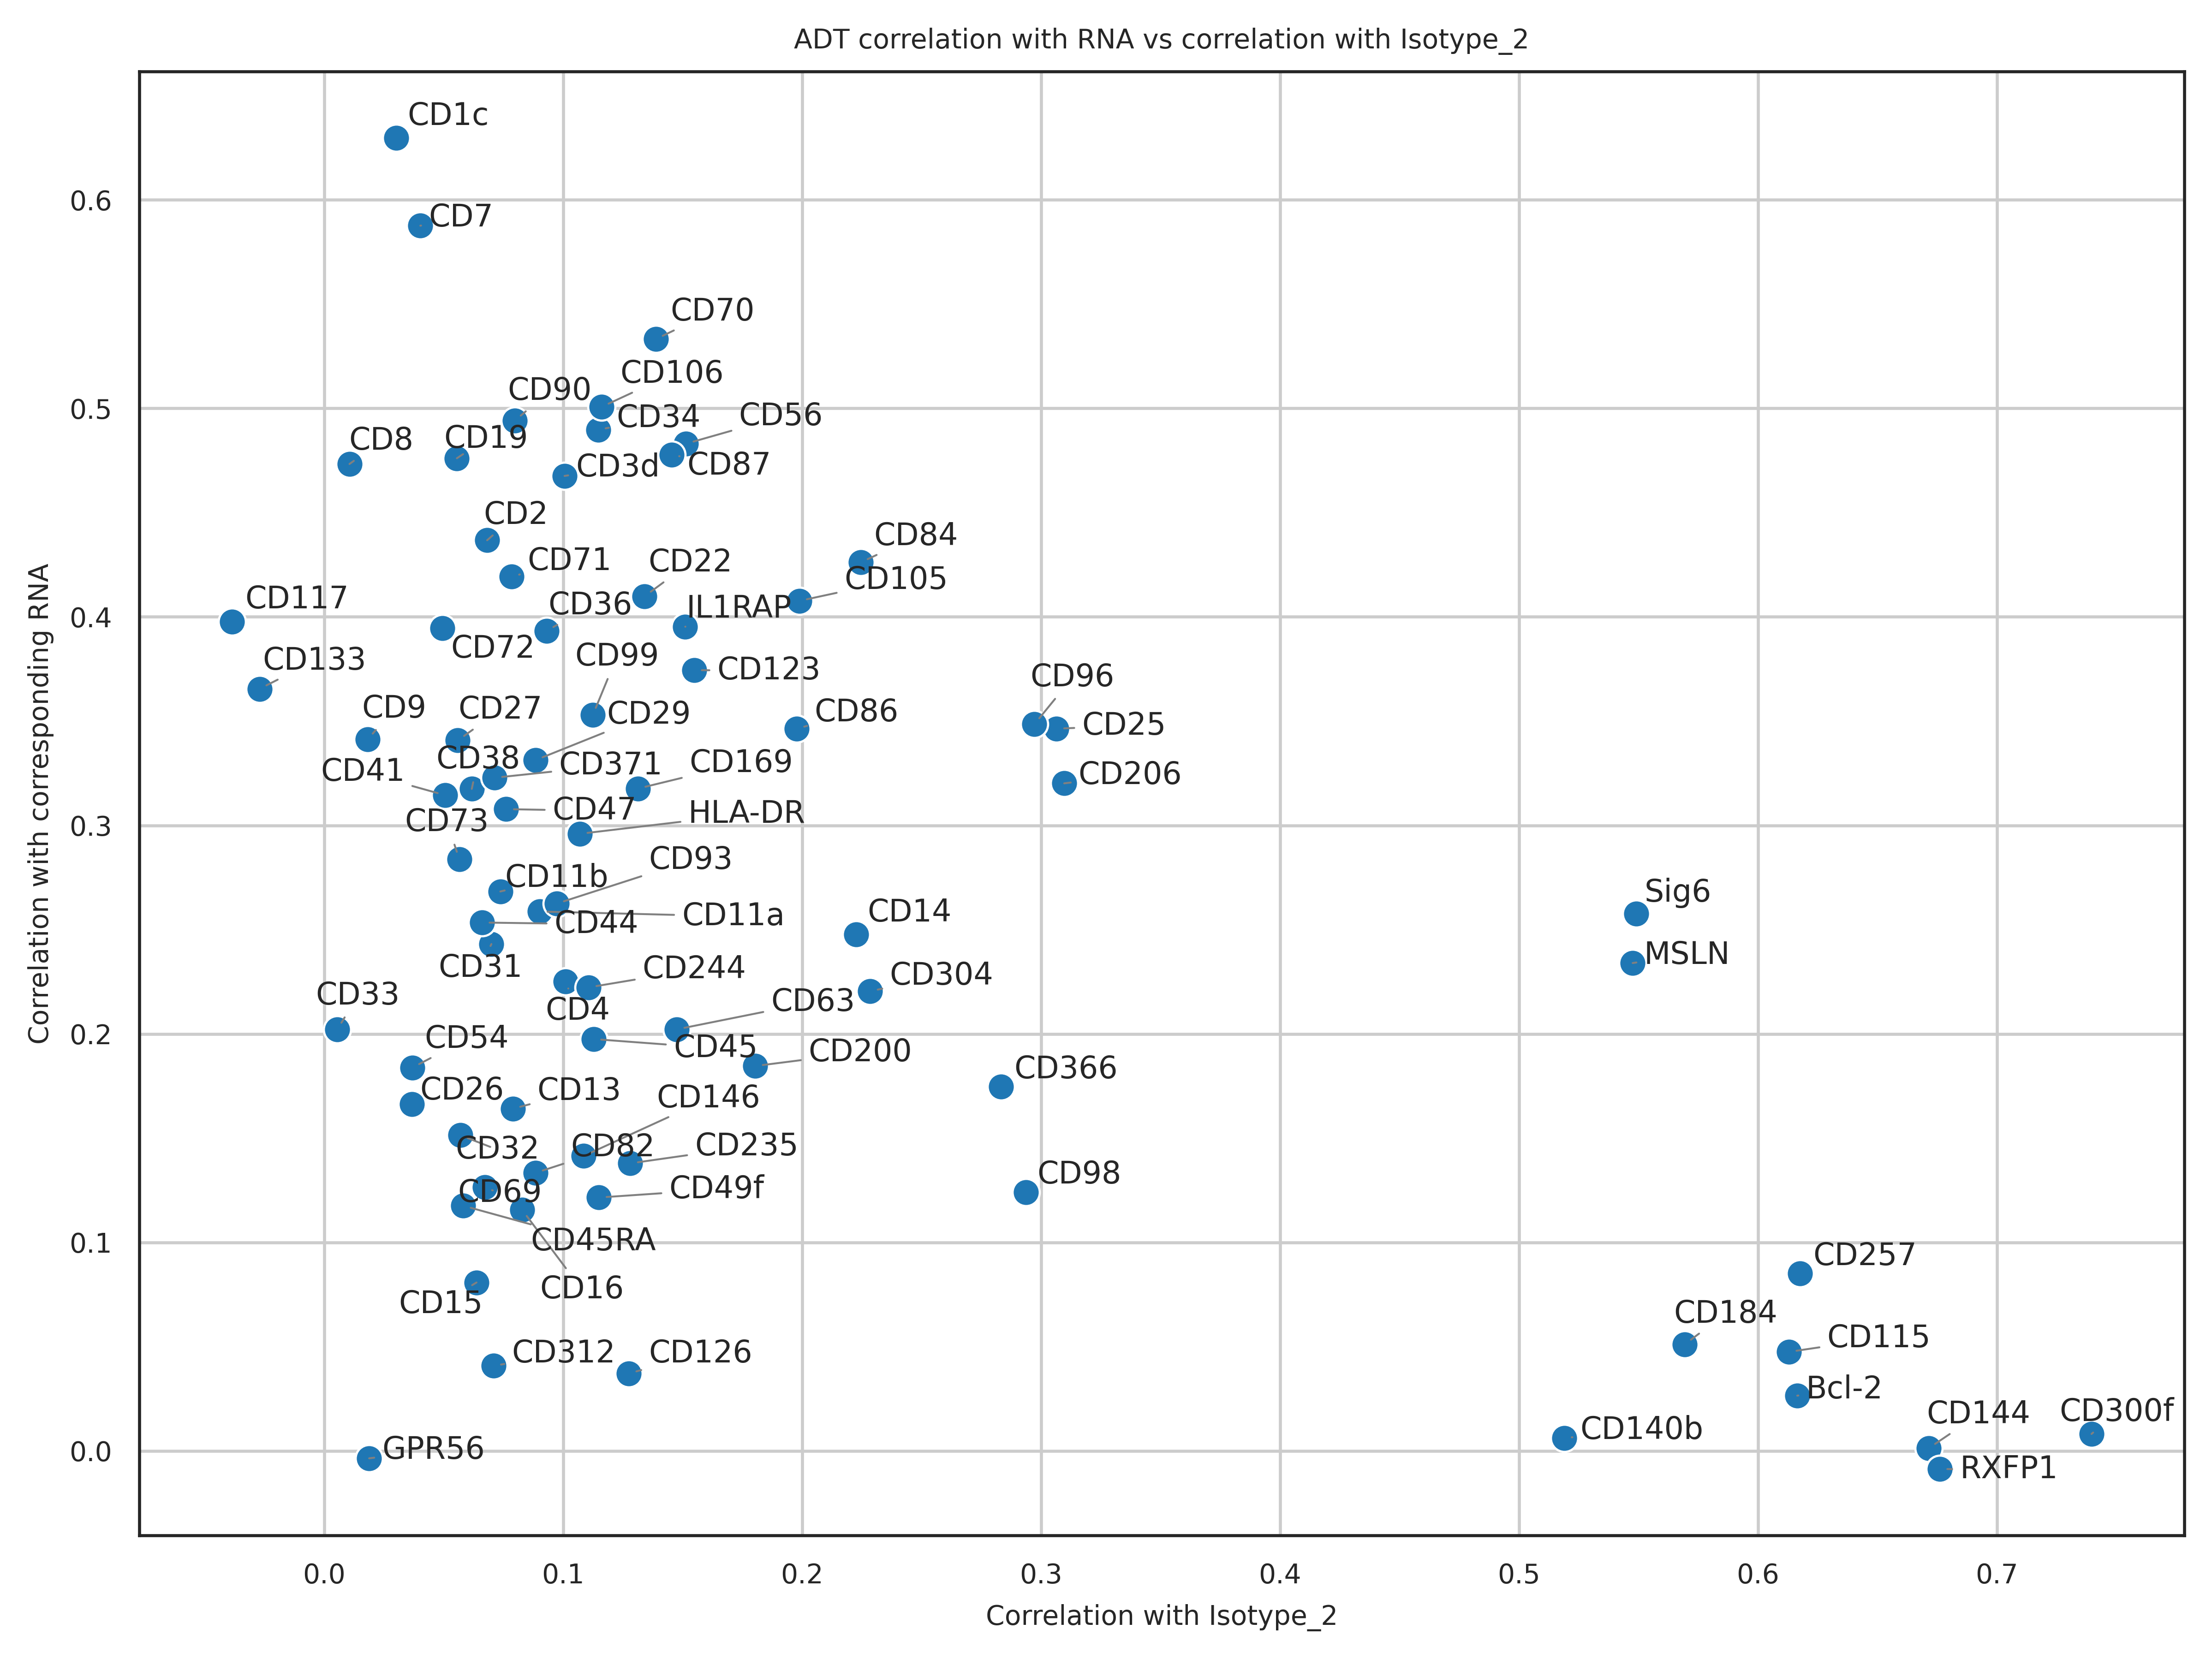

In [100]:
# Define Isotype_2
isotype = "Isotype2"

# Extract Isotype_2 counts
isotype_data = AML_all["adt"][:, isotype].layers["raw_counts"].toarray().flatten()

# Map ADTs to RNA genes
proteins_genes = {
    "CD1c": "CD1C",
    "CD2": "CD2",
    "CD3d": "CD3D",
    "CD4": "CD4",
    "CD7": "CD7",
    "CD8": "CD8A",
    "CD9": "CD9",
    "CD11a": "ITGAL",
    "CD11b": "ITGAM",
    "CD13": "ANPEP",
    "CD14": "CD14",
    "CD15": "FUT4",
    "CD16": "FCGR3A",
    "CD19": "CD19",
    "CD22": "CD22",
    "CD25": "IL2RA",
    "CD26": "DPP4",
    "CD27": "CD27",
    "CD29": "ITGB1",
    "CD31": "PECAM1",
    "CD32": "FCGR2A",
    "CD33": "CD33",
    "CD34": "CD34",
    "CD36": "CD36",
    "CD38": "CD38",
    "CD41": "ITGA2B",
    "CD44": "CD44",
    "CD45": "PTPRC",
    "CD45RA": "PTPRC",
    "CD47": "CD47",
    "CD49f": "ITGA6",
    "CD54": "ICAM1",
    "CD56": "NCAM1",
    "CD63": "CD63",
    "CD69": "CD69",
    "CD70": "CD70",
    "CD71": "TFRC",
    "CD73": "NT5E",
    "CD82": "CD82",
    "CD86": "CD86",
    "CD90": "THY1",
    "CD93": "CD93",
    "CD96": "CD96",
    "CD98": "SLC3A2",
    "CD99": "CD99",
    "CD105": "ENG",
    "CD106": "VCAM1",
    "CD115": "CSF1R",
    "CD117": "KIT",
    "CD123": "IL3RA",
    "CD126": "IL6R",
    "CD140b": "PDGFRB",
    "CD144": "CDH5",
    "CD146": "MCAM",
    "CD169": "SIGLEC1",
    "CD184": "CXCR4",
    "CD200": "CD200",
    "CD206": "MRC1",
    "CD235": "GYPA",
    "CD244": "CD244",
    "CD257": "TNFSF13B",
    "CD304": "NRP1",
    "CD366": "HAVCR2",
    "CD371": "CLEC12A",
    "GPR56": "ADGRG1",
    "HLA-DR": "HLA-DRA",
    "CD87": "PLAUR",
    "CD300f": "CD300LF",
    "Bcl-2": "BCL2",
    "IL1RAP": "IL1RAP",
    "MSLN": "MSLN",
    "RXFP1": "RXFP1",
    "Sig6": "SIGLEC6",
    "CD312": "ADGRE2",
    "CD72": "CD72",
    "CD84": "CD84",
    "CD133": "PROM1"
}

adt_names = list(proteins_genes.keys())
gene_names = [proteins_genes[adt] for adt in adt_names]

# Compute correlations
corr_with_isotype = []
corr_with_rna = []
valid_adts = []

for adt, gene in zip(adt_names, gene_names):
    # Skip if RNA gene not in dataset
    if gene not in AML_all["rna"].var_names:
        continue
    
    adt_data = AML_all["adt"][:, adt].layers["raw_counts"].toarray().flatten()
    rna_data = AML_all["rna"][:, gene].layers["raw_counts"].toarray().flatten()
    
    # Pearson correlations
    corr_iso, _ = pearsonr(adt_data, isotype_data)
    corr_rna, _ = pearsonr(adt_data, rna_data)
    
    corr_with_isotype.append(corr_iso)
    corr_with_rna.append(corr_rna)
    valid_adts.append(adt)

# Scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(x=corr_with_isotype, y=corr_with_rna, s=50)

plt.xlabel("Correlation with Isotype_2")
plt.ylabel("Correlation with corresponding RNA")
plt.title("ADT correlation with RNA vs correlation with Isotype_2")

# Add labels with adjustText
texts = []
for i, adt in enumerate(valid_adts):
    texts.append(plt.text(corr_with_isotype[i], corr_with_rna[i], adt, fontsize=8))

adjust_text(texts, arrowprops=dict(arrowstyle='-', color='gray', lw=0.5))

plt.grid(True)
plt.tight_layout()
plt.savefig("/home/sina.kanannejad/An_scriptnew/QC_ADT/RNA_iso_cor.pdf", dpi=300)


In [101]:
def plot_adt_correlation(adata, adt_layer="raw_counts"):
    """
    Plots the correlation heatmap of ADT expression data within a single AnnData object.
    
    Parameters:
    - adata: AnnData object containing the ADT data
    - adt_layer: The layer to extract ADT data from in adata ('X' or 'raw_counts')
    
    Returns:
    - A heatmap plot showing the correlation between ADT expression data
    """
    
    # Ensure that we are working with ADT data
    adt_data = adata[:, adata.var_names].layers[adt_layer].toarray()
    
    # Convert the ADT expression data to a DataFrame for easier handling
    adt_df = pd.DataFrame(adt_data, index=adata.obs_names, columns=adata.var_names)
    
    # Calculate the correlation matrix for ADT data
    correlation_matrix = adt_df.corr()
    
    # Mask the upper triangle (set it to NaN to avoid redundancy in heatmap)
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
    correlation_matrix = correlation_matrix.where(~mask)
    
    # Create the heatmap plot
    plt.figure(figsize=(20, 15))
    sns.heatmap(correlation_matrix, annot=False, cmap="RdGy_r",
                cbar_kws={"shrink": 0.8}, xticklabels=True, yticklabels=True)
    
    # Adjust font size for the axis labels and ticks
    plt.xticks(fontsize=10)  # X-axis tick labels
    plt.yticks(fontsize=10)  # Y-axis tick labels
    plt.title("ADT Correlation Matrix", fontsize=14)
    
    plt.savefig("/home/sina.kanannejad/An_scriptnew/QC_ADT/adt_adt_cor.pdf", dpi=300)


In [102]:
plot_adt_correlation(AML_all["adt"])

In [59]:
AML_all["adt"].var_names = AML_all["adt"].var_names.str.replace('-1', '', regex=False).str.replace('_ADT', '', regex=False)

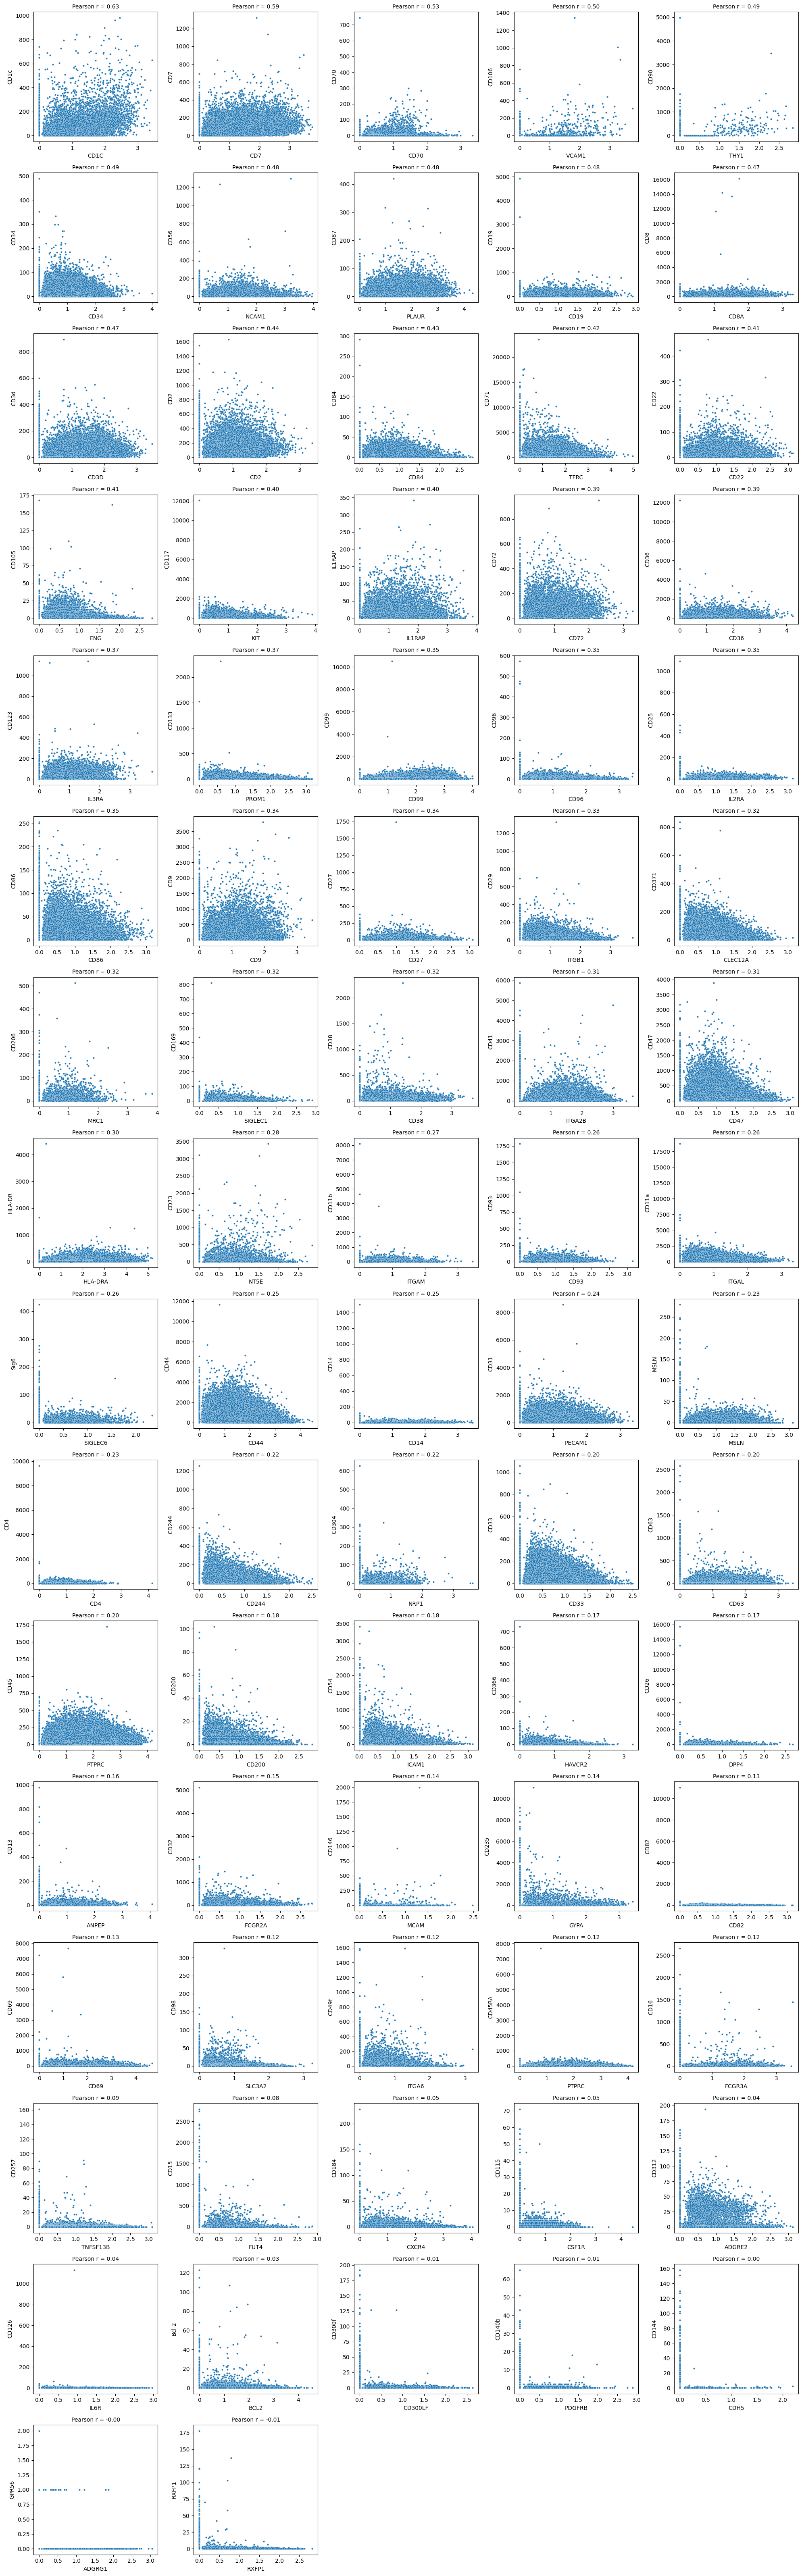

In [61]:
# Get indices for RNA and ADT
rna_indi = [AML_all["rna"].var_names.get_loc(gene) for gene in gene_names]
adt_indi = [AML_all["adt"].var_names.get_loc(adt) for adt in prot_names]

# Calculate correlations
cor_list = []
for r_idx, a_idx in zip(rna_indi, adt_indi):
    rna_data = AML_all["rna"][:, r_idx].layers["raw_counts"].toarray().flatten()
    adt_data = AML_all["adt"][:, a_idx].layers["raw_counts"].toarray().flatten()
    corr, _ = pearsonr(rna_data, adt_data)
    cor_list.append(corr)

# Sort pairs by correlation
sorted_indices = np.argsort(cor_list)[::-1]  # descending
sorted_rna = [gene_names[i] for i in sorted_indices]
sorted_adt = [prot_names[i] for i in sorted_indices]
sorted_cor = [cor_list[i] for i in sorted_indices]

# Plot scatter plots
n_pairs = len(sorted_rna)
n_cols = 5
n_rows = int(np.ceil(n_pairs / n_cols))
plt.figure(figsize=(4*n_cols, 4*n_rows))

for i, (rna, adt, corr) in enumerate(zip(sorted_rna, sorted_adt, sorted_cor)):
    plt.subplot(n_rows, n_cols, i+1)
    rna_data = AML_all["rna"][:, AML_all["rna"].var_names.get_loc(rna)].X.toarray().flatten()
    adt_data = AML_all["adt"][:, AML_all["adt"].var_names.get_loc(adt)].layers["raw_counts"].toarray().flatten()
    sns.scatterplot(x=rna_data, y=adt_data, s=10)
    plt.xlabel(rna)
    plt.ylabel(adt)
    plt.title(f"Pearson r = {corr:.2f}", fontsize=10)

plt.tight_layout()
plt.show()


In [ ]:
ADTs_remove = ["Isotype1_ADT","Isotype2_ADT","Isotype3_ADT","RXFP1-1_ADT","Bcl-2_ADT","CD300f_ADT",
               "CD184_ADT","CD257_ADT","CD115_ADT","CD144_ADT","CD140b_ADT","GPR56_ADT","KDEL-GPR78_ADT"]

In [ ]:
AML_all["adt"].X = AML_all["adt"].layers["raw_counts"].copy()
sc.pp.calculate_qc_metrics(AML_all["adt"], inplace=True, percent_top=None)
def do_qc(df):
  
    return np.where((df["n_genes_by_counts"] > 14) & (df["total_counts"] > 200) &
                    (df["total_counts"] < 15000), "keep", "discard")

AML_all["adt"].obs["QC_stat"] = do_qc(AML_all["adt"].obs)
AML_clean = AML_all[AML_all["adt"].obs["QC_stat"].isin(["keep"])].copy()
AML_clean

In [ ]:
AML_malig_clean_adt = AML_clean["adt"][:, ~AML_clean["adt"].var_names.isin(ADTs_remove)].copy()
AML_malig_clean_adt

In [ ]:
def train_totalvi_model(mdata, model_path, gene_list=None):
    """
    Train a totalVI model using specified genes
    
    Args:
        mdata_path: Path to mudata file
        model_path: Path to save the trained model
        gene_list: List of genes to use (if None, will use HVGs)
        batch_size: Batch size for training
        early_stopping: Whether to use early stopping
    """
    
    def log(message):
        print(f"[{pd.Timestamp.now()}] {message}", flush=True)
    
    try:
        
        # Extract ADT information
        log("Processing ADT data...")
        ADT_var_names = mdata["adt_clean"].var_names
        obs_names = mdata["adt_clean"].obs_names
        mdata["adt_clean"].X = mdata["adt_clean"].layers["raw_counts"].copy()
        
        # Create protein expression DataFrame
        protein_expression_df = pd.DataFrame(
            mdata["adt_clean"].layers["raw_counts"].toarray(), 
            index=obs_names,
            columns=ADT_var_names
        )
        
        # Process RNA data
        log("Processing RNA data...")
        ref = mdata["rna"].copy()
        
        # If gene list provided, subset the data
        if gene_list is not None:
            log(f"Subsetting to {len(gene_list)} specified genes...")
            # Check which genes are present in the data
            available_genes = [gene for gene in gene_list if gene in ref.var_names]
            missing_genes = set(gene_list) - set(available_genes)
            
            if missing_genes:
                log(f"Warning: {len(missing_genes)} genes not found in dataset:")
                log(f"Missing genes: {', '.join(missing_genes)}")
            
            ref = ref[:, available_genes].copy()
            log(f"Using {len(available_genes)} genes for model training")
        else:
            # Use HVGs if no gene list provided
            log("Computing highly variable genes...")
            sc.pp.highly_variable_genes(
                ref,
                n_top_genes=10000,
                flavor="seurat_v3",
                batch_key="sample",
                subset=True,
            )
        
        
        # Setup anndata for totalVI
        log("Setting up anndata for totalVI...")
        ref.obsm["protein_expression"] = protein_expression_df.values
        
        sca.models.TOTALVI.setup_anndata(
            ref,
            batch_key="sample",
            protein_expression_obsm_key="protein_expression",
            layer="raw_counts"
        )
        
        # Configure model
        log("Configuring totalVI model...")
        arches_params = dict(
            use_layer_norm="both",
            use_batch_norm="none",
        )
        
        # Initialize model
        vae_ref = sca.models.TOTALVI(
            ref,
            **arches_params
        )
        
        # Train model
        log("Training model...")
        vae_ref.train()
        
        # Save model
        log("Saving model...")
        vae_ref.save(model_path, overwrite=True)
        
        log("Model training completed successfully!")
        
        return vae_ref
        
    except Exception as e:
        log(f"Error occurred: {str(e)}")
        raise

In [ ]:
model = train_totalvi_model(
    mdata= AML_clean ,
    model_path="/scArch_ADT_pAML_main"
)